In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import locale
import datetime

In [3]:
df = pd.read_excel(r'C:\Users\Jessica\OneDrive\Área de Trabalho\analise-de-dados-projetos\base_dados\vendas.xlsx')

In [4]:
df.shape

(9994, 21)

In [5]:
df.head()

,Category,City,Country,Customer Name,Manufacturer,Order Date,Order ID,Postal Code,Product Name,Region,...,Ship Date,Ship Mode,State,Sub-Category,Discount,Number of Records,Profit,Profit Ratio,Quantity,Sales
0,Office Supplies,Houston,United States,Darren Powers,Message Book,2013-01-03,CA-2011-103800,77095,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Central,...,2013-01-07,Standard Class,Texas,Paper,0.2,1,$6,0.34,2,$16
1,Office Supplies,Naperville,United States,Phillina Ober,Avery,2013-01-04,CA-2011-112326,60540,Avery 508,Central,...,2013-01-08,Standard Class,Illinois,Labels,0.2,1,$4,0.36,3,$12
2,Office Supplies,Naperville,United States,Phillina Ober,SAFCO,2013-01-04,CA-2011-112326,60540,SAFCO Boltless Steel Shelving,Central,...,2013-01-08,Standard Class,Illinois,Storage,0.2,1,-$65,-0.24,3,$273
3,Office Supplies,Naperville,United States,Phillina Ober,GBC,2013-01-04,CA-2011-112326,60540,GBC Standard Plastic Binding Systems Combs,Central,...,2013-01-08,Standard Class,Illinois,Binders,0.8,1,-$5,-1.55,2,$4
4,Office Supplies,Philadelphia,United States,Mick Brown,Avery,2013-01-05,CA-2011-141817,19143,Avery Hi-Liter EverBold Pen Style Fluorescent ...,East,...,2013-01-12,Standard Class,Pennsylvania,Art,0.2,1,$5,0.25,3,$20


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Category           9994 non-null   object        
 1   City               9994 non-null   object        
 2   Country            9994 non-null   object        
 3   Customer Name      9994 non-null   object        
 4   Manufacturer       9994 non-null   object        
 5   Order Date         9994 non-null   datetime64[ns]
 6   Order ID           9994 non-null   object        
 7   Postal Code        9994 non-null   int64         
 8   Product Name       9994 non-null   object        
 9   Region             9994 non-null   object        
 10  Segment            9994 non-null   object        
 11  Ship Date          9994 non-null   datetime64[ns]
 12  Ship Mode          9994 non-null   object        
 13  State              9994 non-null   object        
 14  Sub-Cate

In [7]:
#removendo o simbolo "$" das colunas Sales e Profit e convertendo para Float
df['Sales'] = df['Sales'].replace('[\$,]', '', regex=True).astype(float)
df['Profit'] = df['Profit'].replace('[\$,]', '', regex=True).astype(float)


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Jessica\AppData\Local\Temp\ipykernel_6736\3077562229.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['Sales'] = df['Sales'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\Jessica\AppData\Local\Temp\ipykernel_6736\3077562229.py:3: SyntaxWarning: invalid escape sequence '\$'
  df['Profit'] = df['Profit'].replace('[\$,]', '', regex=True).astype(float)


In [ ]:
#Conferindo a mudança
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Category           9994 non-null   object        
 1   City               9994 non-null   object        
 2   Country            9994 non-null   object        
 3   Customer Name      9994 non-null   object        
 4   Manufacturer       9994 non-null   object        
 5   Order Date         9994 non-null   datetime64[ns]
 6   Order ID           9994 non-null   object        
 7   Postal Code        9994 non-null   int64         
 8   Product Name       9994 non-null   object        
 9   Region             9994 non-null   object        
 10  Segment            9994 non-null   object        
 11  Ship Date          9994 non-null   datetime64[ns]
 12  Ship Mode          9994 non-null   object        
 13  State              9994 non-null   object        
 14  Sub-Cate

In [ ]:
#Criando colunas de data para análise temporal
locale.setlocale(locale.LC_ALL, 'pt_BR.utf8')

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['mes'] = df['Order Date'].dt.month
df['ano'] = df['Order Date'].dt.year
df['dia'] = df['Order Date'].dt.day
df['dia_nome'] = df['Order Date'].dt.day_name(locale='pt_BR.utf8')
df['mes_ano'] = df['Order Date'].dt.to_period('M')


In [38]:
df.dtypes[['Sales', 'Profit', 'mes', 'ano', 'mes_ano', 'dia_nome']]

Sales         float64
Profit        float64
mes             int32
ano             int32
mes_ano     period[M]
dia_nome       object
dtype: object

In [48]:
#dia da semana com mais vendas
df.groupby(['dia_nome']).size()

dia_nome
Domingo          1871
Quarta-feira     1463
Quinta-feira     1818
Segunda-feira    1106
Sexta-feira      1655
Sábado           1710
Terça-feira       371
dtype: int64

In [12]:
#Estilo dos Gráficos
sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = (12, 6)


In [13]:
#Visão geral
total_receita = df['Sales'].sum()
total_lucro = df['Profit'].sum()
ticket_medio = df['Sales'].mean()

print(f"Total de Receita: ${total_receita:,.2f}")
print(f"Total de Lucro: ${total_lucro:,.2f}")
print(f"Ticket Médio: ${ticket_medio:,.2f}")


Total de Receita: $2,297,354.00
Total de Lucro: $286,347.00
Ticket Médio: $229.87


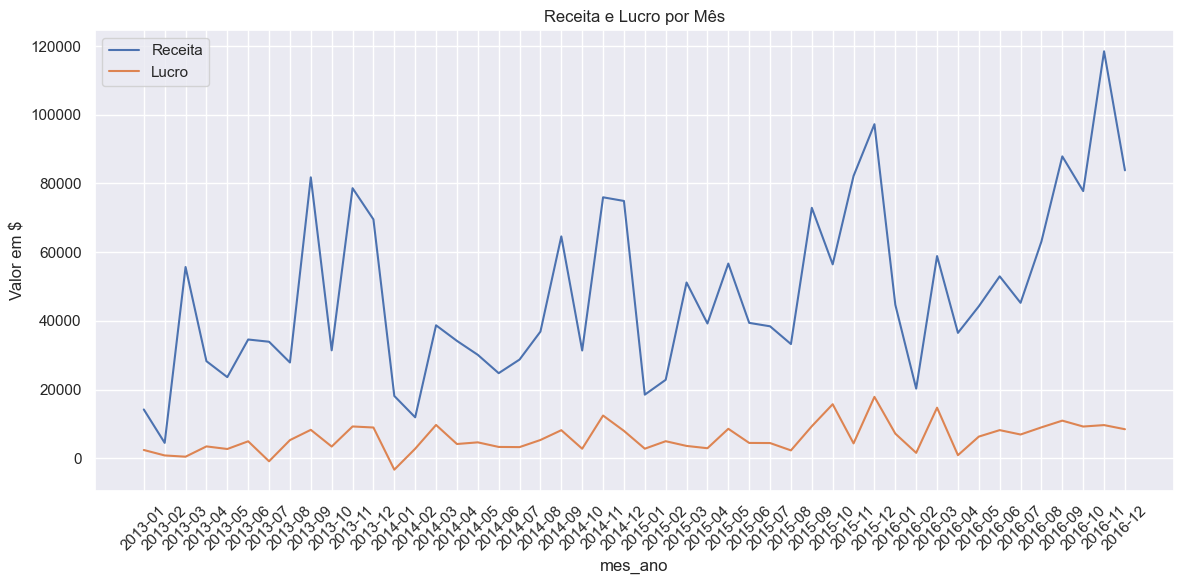

In [16]:
#Receita e lucro por mês
mensal = df.groupby('mes_ano')[['Sales', 'Profit']].sum().reset_index()

#convertendo para string
mensal['mes_ano'] = mensal['mes_ano'].astype(str)

#Gráfico - Receita e lucro por mês
sns.lineplot(data=mensal, x='mes_ano', y='Sales', label='Receita')
sns.lineplot(data=mensal, x='mes_ano', y='Profit', label='Lucro')
plt.title('Receita e Lucro por Mês')
plt.ylabel('Valor em $')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Jessica\AppData\Local\Temp\ipykernel_6736\2168355023.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_produto['Sales'], y=top_produto.index, palette="viridis")


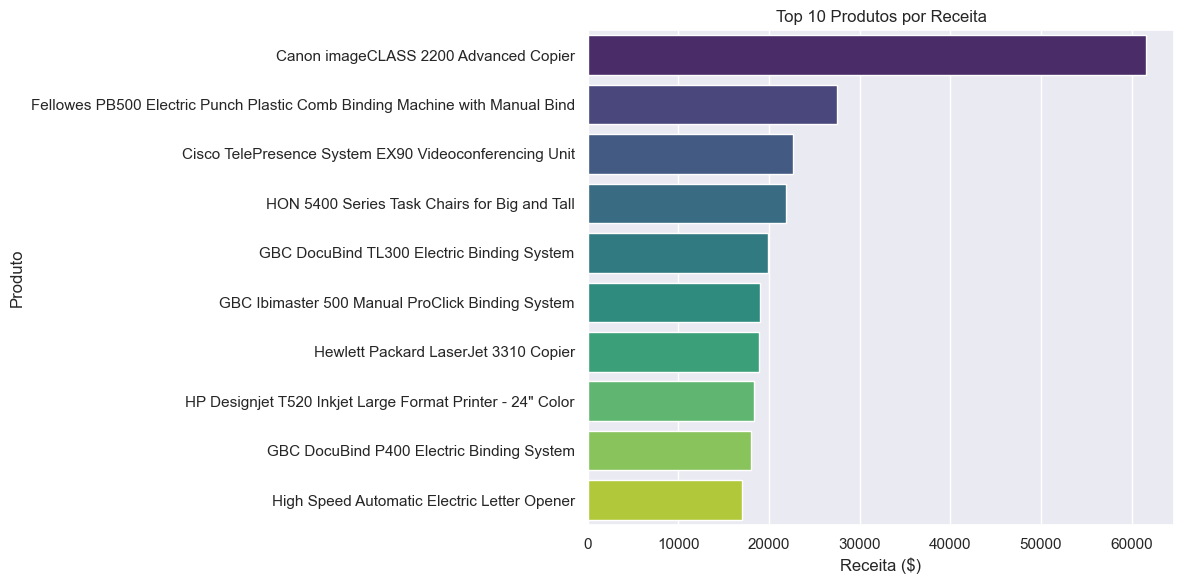

In [17]:
#Top 10 produtos por Receita
top_produto = df.groupby('Product Name')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False).head(10)

sns.barplot(x=top_produto['Sales'], y=top_produto.index, palette="viridis")
plt.title("Top 10 Produtos por Receita")
plt.xlabel("Receita ($)")
plt.ylabel("Produto")
plt.tight_layout()
plt.show()

C:\Users\Jessica\AppData\Local\Temp\ipykernel_6736\3003860290.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=estado['Sales'], y=estado.index, palette="Blues_d")


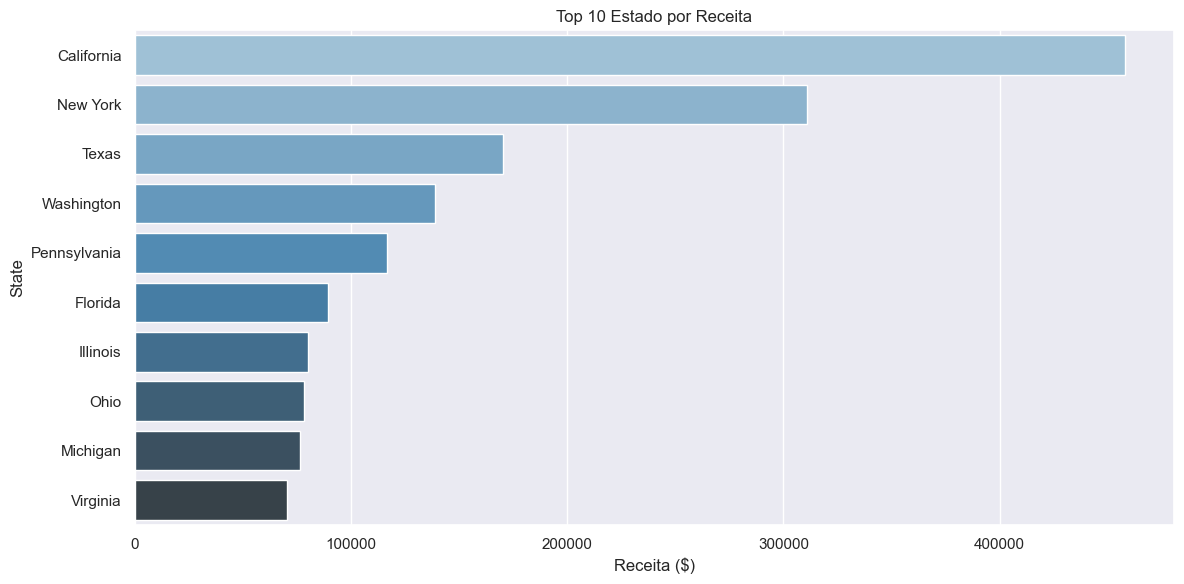

In [19]:
#Receita por Estado top 10
estado = df.groupby('State')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False).head(10)

sns.barplot(x=estado['Sales'], y=estado.index, palette="Blues_d")
plt.title("Top 10 Estado por Receita")
plt.xlabel("Receita ($)")
plt.tight_layout()
plt.show()

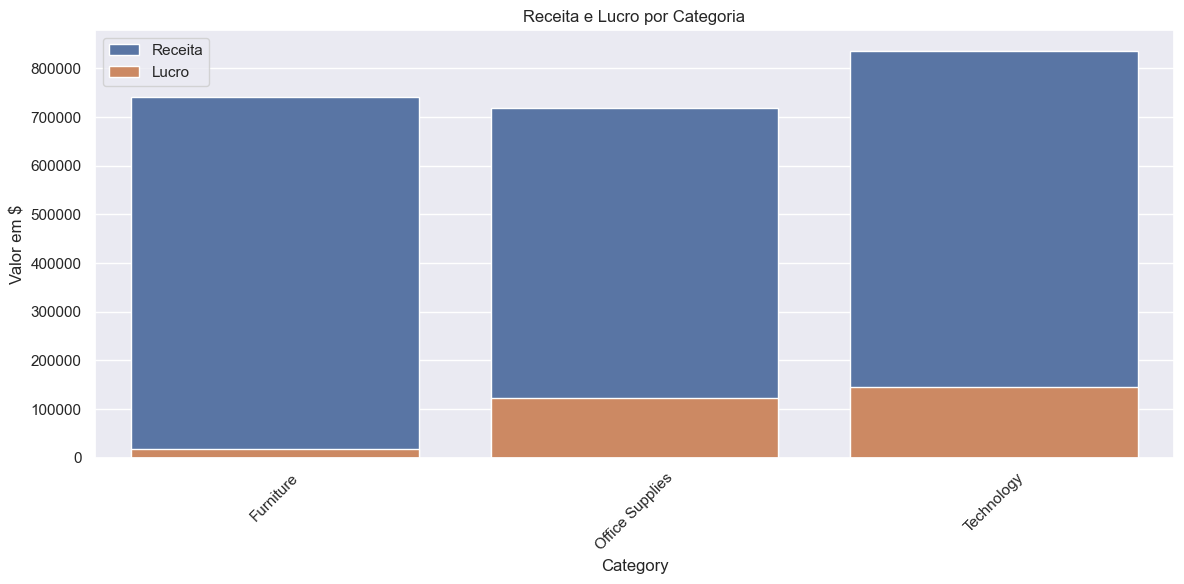

In [ ]:
#Categoria por Receita e Lucro
categoria = df.groupby(['Category'])[['Sales', 'Profit']].sum().reset_index()

sns.barplot(data=categoria, x='Category', y='Sales', label='Receita')
sns.barplot(data=categoria, x='Category', y='Profit', label='Lucro')
plt.title('Receita e Lucro por Categoria')
plt.ylabel('Valor em $')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Jessica\AppData\Local\Temp\ipykernel_6736\40456316.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dias.index, y=dias.values, palette='viridis')


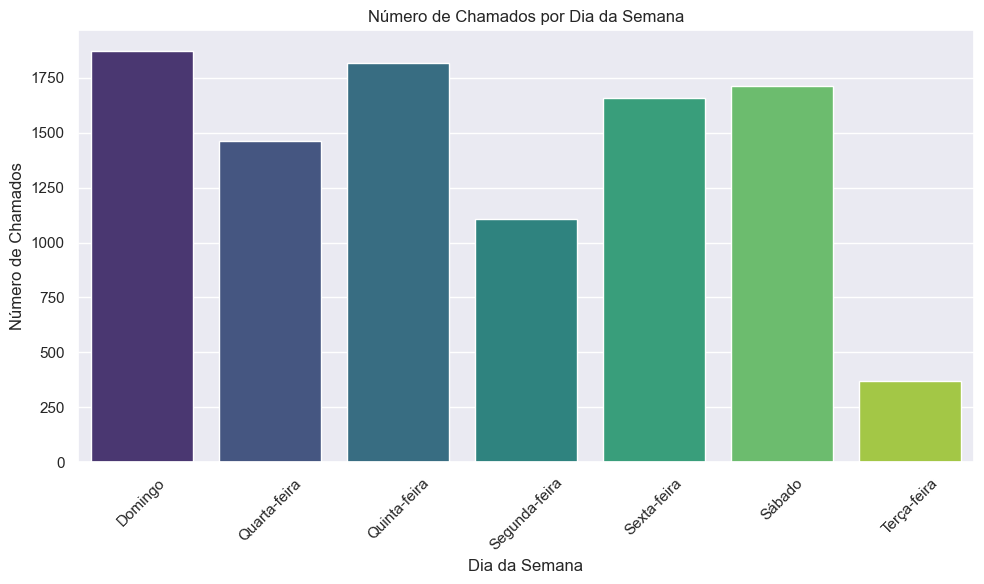

In [50]:
#Dias da semana com mais venda
dias = df.groupby(['dia_nome']).size()


plt.figure(figsize=(10, 6))
sns.barplot(x=dias.index, y=dias.values, palette='viridis')
plt.title('Número de Chamados por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Chamados')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
#Agrupar vendas por produto
produtos = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).reset_index()

#Calcular a % acumulada
produtos['perc_acumulado'] = produtos['Sales'].cumsum() / produtos['Sales'].sum()

#Definir classes ABC
def classificar_abc(perc):
    if perc <= 0.8:
        return 'A'
    elif perc <= 0.95:
        return 'B'
    else:
        return 'C'
    
produtos['Classe_ABC'] = produtos['perc_acumulado'].apply(classificar_abc)


#ver resultado
print(produtos['Classe_ABC'].value_counts())
print(produtos.head())

Classe_ABC
C    941
B    490
A    419
Name: count, dtype: int64
                                        Product Name    Sales  perc_acumulado  \
0              Canon imageCLASS 2200 Advanced Copier  61600.0        0.026813   
1  Fellowes PB500 Electric Punch Plastic Comb Bin...  27454.0        0.038764   
2  Cisco TelePresence System EX90 Videoconferenci...  22638.0        0.048618   
3       HON 5400 Series Task Chairs for Big and Tall  21870.0        0.058137   
4         GBC DocuBind TL300 Electric Binding System  19824.0        0.066766   

  Classe_ABC  
0          A  
1          A  
2          A  
3          A  
4          A  


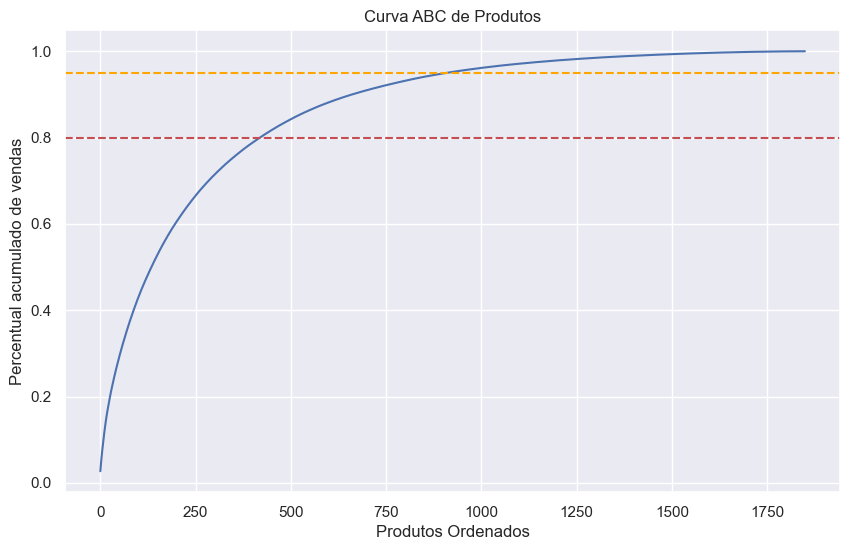

In [22]:
#Gráfico: Curva ABC

plt.figure(figsize=(10,6))
sns.lineplot(data=produtos, x=produtos.index, y='perc_acumulado')
plt.axhline(0.8, color='r', linestyle='--')
plt.axhline(0.95, color='orange', linestyle='--')
plt.title('Curva ABC de Produtos')
plt.xlabel('Produtos Ordenados')
plt.ylabel('Percentual acumulado de vendas')
plt.show()

Interpretação das linhas horizontais:

1 - Linha vermelha (= 80%) - marca o ponto onde estão os produtos da Classe A.
    
    - São aproximadamente 20% dos produtos que geram cerca de 80% da receita.

2 - Linha Laranja (=95%) - separa os produtos de Classe B e C.

    - Apartir daqui, entram os produtos de baixo impacto, que juntos somam o restante da recieta, mas individualmente vendem pouco.


Conclusão:

- A curva é bem acentuada no início - Poucos produtos respondem por grande parte das vendas (Regra de Pareto 80/20).

- Depois, a curva achata, mostrando que muitos produtos têm pouca participação no faturamento.

In [23]:
# Exibir tabela
print(produtos.head(20))  # Mostra os 20 primeiros produtos

                                         Product Name    Sales  \
0               Canon imageCLASS 2200 Advanced Copier  61600.0   
1   Fellowes PB500 Electric Punch Plastic Comb Bin...  27454.0   
2   Cisco TelePresence System EX90 Videoconferenci...  22638.0   
3        HON 5400 Series Task Chairs for Big and Tall  21870.0   
4          GBC DocuBind TL300 Electric Binding System  19824.0   
5    GBC Ibimaster 500 Manual ProClick Binding System  19026.0   
6                Hewlett Packard LaserJet 3310 Copier  18840.0   
7   HP Designjet T520 Inkjet Large Format Printer ...  18375.0   
8           GBC DocuBind P400 Electric Binding System  17965.0   
9         High Speed Automatic Electric Letter Opener  17031.0   
10          Lexmark MX611dhe Monochrome Laser Printer  16830.0   
11  Martin Yale Chadless Opener Electric Letter Op...  16656.0   
12               Ibico EPK-21 Electric Binding System  15876.0   
13  Riverside Palais Royal Lawyers Bookcase, Royal...  15611.0   
14   3D Sy

C:\Users\Jessica\AppData\Local\Temp\ipykernel_6736\1020283120.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Classe_ABC', data=produtos, palette='Set2')


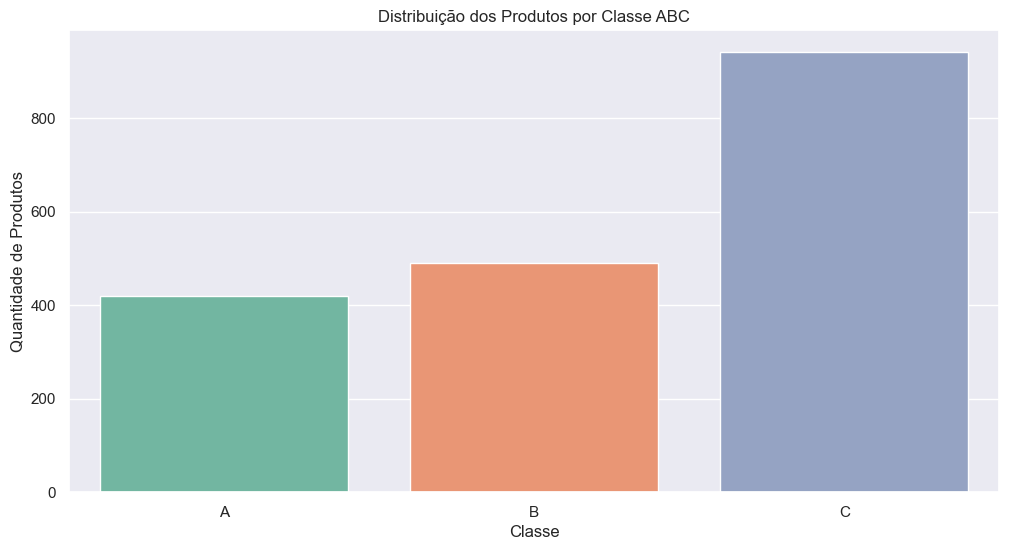

In [ ]:
# Gráfico de distribuição das classes
sns.countplot(x='Classe_ABC', data=produtos, palette='Set2')
plt.title('Distribuição dos Produtos por Classe ABC')
plt.xlabel('Classe')
plt.ylabel('Quantidade de Produtos')
plt.show()

In [25]:
df.head()

,Category,City,Country,Customer Name,Manufacturer,Order Date,Order ID,Postal Code,Product Name,Region,...,Sub-Category,Discount,Number of Records,Profit,Profit Ratio,Quantity,Sales,mes,ano,mes_ano
0,Office Supplies,Houston,United States,Darren Powers,Message Book,2013-01-03,CA-2011-103800,77095,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Central,...,Paper,0.2,1,6.0,0.34,2,16.0,1,2013,2013-01
1,Office Supplies,Naperville,United States,Phillina Ober,Avery,2013-01-04,CA-2011-112326,60540,Avery 508,Central,...,Labels,0.2,1,4.0,0.36,3,12.0,1,2013,2013-01
2,Office Supplies,Naperville,United States,Phillina Ober,SAFCO,2013-01-04,CA-2011-112326,60540,SAFCO Boltless Steel Shelving,Central,...,Storage,0.2,1,-65.0,-0.24,3,273.0,1,2013,2013-01
3,Office Supplies,Naperville,United States,Phillina Ober,GBC,2013-01-04,CA-2011-112326,60540,GBC Standard Plastic Binding Systems Combs,Central,...,Binders,0.8,1,-5.0,-1.55,2,4.0,1,2013,2013-01
4,Office Supplies,Philadelphia,United States,Mick Brown,Avery,2013-01-05,CA-2011-141817,19143,Avery Hi-Liter EverBold Pen Style Fluorescent ...,East,...,Art,0.2,1,5.0,0.25,3,20.0,1,2013,2013-01


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Category           9994 non-null   object        
 1   City               9994 non-null   object        
 2   Country            9994 non-null   object        
 3   Customer Name      9994 non-null   object        
 4   Manufacturer       9994 non-null   object        
 5   Order Date         9994 non-null   datetime64[ns]
 6   Order ID           9994 non-null   object        
 7   Postal Code        9994 non-null   int64         
 8   Product Name       9994 non-null   object        
 9   Region             9994 non-null   object        
 10  Segment            9994 non-null   object        
 11  Ship Date          9994 non-null   datetime64[ns]
 12  Ship Mode          9994 non-null   object        
 13  State              9994 non-null   object        
 14  Sub-Cate

In [27]:
#Calcular margem por categoria
categoria_margem = df.groupby('Category').agg({'Sales':'sum', 'Profit':'sum'}).reset_index()
categoria_margem['Margem (%)'] = (categoria_margem['Profit'] / categoria_margem['Sales']) * 100

print(categoria_margem)

          Category     Sales    Profit  Margem (%)
0        Furniture  742006.0   18444.0    2.485694
1  Office Supplies  719127.0  122474.0   17.030928
2       Technology  836221.0  145429.0   17.391216


C:\Users\Jessica\AppData\Local\Temp\ipykernel_6736\558116990.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Margem (%)', y='Category', data=categoria_margem, palette='viridis')


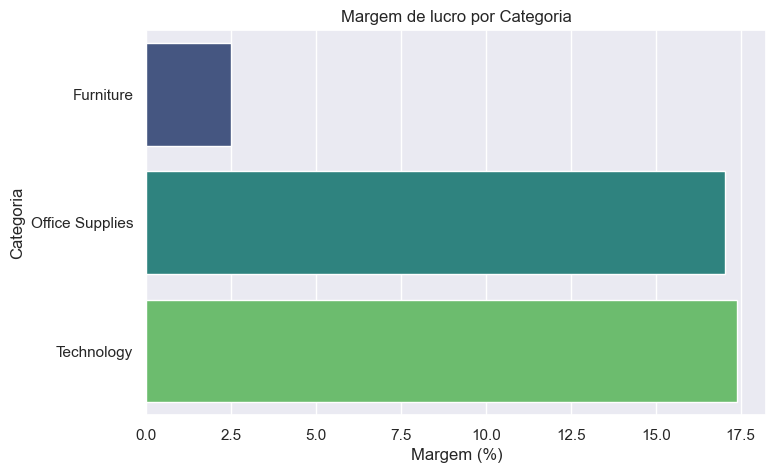

In [29]:
# Gráfico da margem

plt.figure(figsize=(8,5))
sns.barplot(x='Margem (%)', y='Category', data=categoria_margem, palette='viridis')
plt.title('Margem de lucro por Categoria')
plt.xlabel('Margem (%)')
plt.ylabel('Categoria')
plt.show()

Categoria com maior margem -- foco para expandir

Categoira com baixa margem -- avaliar renegociação com fornecedores ou estratégia de upsell

In [30]:
# Receita por Cliente

clientes_receita = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)
print(clientes_receita)

Customer Name
Sean Miller           25042.0
Tamara Chand          19050.0
Raymond Buch          15117.0
Tom Ashbrook          14596.0
Adrian Barton         14476.0
Ken Lonsdale          14175.0
Sanjit Chand          14145.0
Hunter Lopez          12875.0
Sanjit Engle          12209.0
Christopher Conant    12128.0
Name: Sales, dtype: float64


C:\Users\Jessica\AppData\Local\Temp\ipykernel_6736\2636055973.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clientes_receita.values, y=clientes_receita.index, palette='coolwarm')


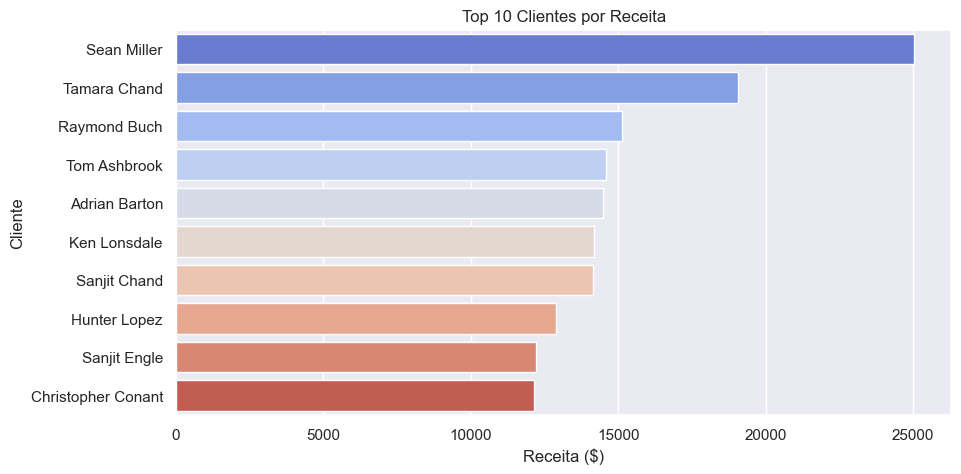

In [31]:
#Gráfico

plt.figure(figsize=(10,5))
sns.barplot(x=clientes_receita.values, y=clientes_receita.index, palette='coolwarm')
plt.title('Top 10 Clientes por Receita')
plt.xlabel('Receita ($)')
plt.ylabel('Cliente')
plt.show()

Quem gera mais receita pode ser fidelizado com benéficios.

Quem gera menos receita pode ser alvo de campanhas para aumentar vendas.

In [32]:
#Receita por Região

regiao_receita = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
print(regiao_receita)

Region
West       725514.0
East       678834.0
Central    501256.0
South      391750.0
Name: Sales, dtype: float64


C:\Users\Jessica\AppData\Local\Temp\ipykernel_6736\15157829.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=regiao_receita.values, y=regiao_receita.index, palette='crest')


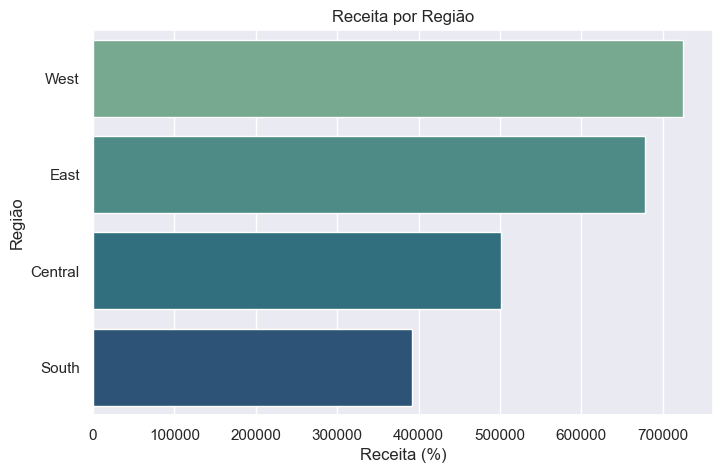

In [33]:
#Gráfico

plt.figure(figsize=(8,5))
sns.barplot(x=regiao_receita.values, y=regiao_receita.index, palette='crest')
plt.title('Receita por Região')
plt.xlabel('Receita (%)')
plt.ylabel('Região')
plt.show()

Regiões com mairo venda -- Investir mais em marketing e Operações

Regiões com menor venda -- Explorar motivos: Losgistica? Concorrencia?


In [34]:
# Quantidade de vendas e margem
produto_vendas = df.groupby('Product Name').agg({'Quantity':'sum', 'Sales':'sum', 'Profit':'sum'}).reset_index()
produto_vendas['Margem'] = produto_vendas['Profit'] / produto_vendas['Sales']

# Definir produtos com alta venda mas baixa margem
alto_volume_baixa_margem = produto_vendas[(produto_vendas['Quantity'] > produto_vendas['Quantity'].quantile(0.75)) & (produto_vendas['Margem'] < 0.05)]

print(alto_volume_baixa_margem)

                                           Product Name  Quantity   Sales  \
51    Acco 6 Outlet Guardian Premium Plus Surge Supp...        31   289.0   
57                        Acco D-Ring Binder w/DublLock        31   234.0   
73    Acco Pressboard Covers with Storage Hooks, 14 ...        37    65.0   
81             Acco Suede Grain Vinyl Round Ring Binder        29    40.0   
83                  Accohide Poly Flexible Ring Binders        34    43.0   
...                                                 ...       ...     ...   
1552                        Tennsco Industrial Shelving        29  1283.0   
1556                        Tennsco Single-Tier Lockers        28  9159.0   
1558  Tennsco Stur-D-Stor Boltless Shelving, 5 Shelv...        33  4384.0   
1622      Wilson Jones 1" Hanging DublLock Ring Binders        46   116.0   
1630  Wilson Jones Elliptical Ring 3 1/2" Capacity B...        42   835.0   

      Profit    Margem  
51    -114.0 -0.394464  
57    -101.0 -0.431624  


Produtos com grande volume, mas pouca margem → oportunidades para:

Upsell: vender versão premium.

Cross-sell: vender junto com outros itens de maior margem.